In [1]:
# import sys
# !{sys.executable} -m pip install librosa
# !{sys.executable} -m pip install numpy
# !{sys.executable} -m pip install pandas
# !{sys.executable} -m pip install matplotlib

In [2]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv('data_mfcc_piano_violin.csv')

In [4]:
df.dropna()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,label
0,-424.469330,237.982895,6.731316,-3.202654,14.532297,-7.691171,-5.938550,1.828542,0.126493,-1.419745,...,-15.246060,-15.932623,-5.570814,3.378149,3.227192,-0.593816,-2.097961,-2.741678,-3.434451,piano
1,-420.475647,230.228104,8.183341,0.445985,23.258064,4.189878,2.004561,3.607440,-1.887056,-3.405439,...,-10.857403,-14.574149,-10.775605,-6.764171,-3.649573,-1.686252,-3.082775,-4.791152,-5.136883,piano
2,-391.824371,259.276093,12.752640,-20.452869,12.685456,-1.488779,-6.005210,2.188318,-3.297070,-7.162425,...,1.544302,-1.582307,-6.687898,-7.898934,-5.066751,-4.520948,-6.353752,-5.899755,-2.472929,piano
3,-510.576508,229.395294,25.448526,-4.467762,6.040303,2.116656,-4.205454,-14.291451,-13.079196,-5.157303,...,-0.368388,6.425932,10.205118,6.254388,-0.309801,-7.568224,-10.515248,-7.098872,-3.438269,piano
4,-456.584351,236.038055,19.959612,-10.859509,13.760965,0.094559,-6.522711,-5.254314,-5.966574,-4.693297,...,-8.892569,-8.372187,-11.724998,-9.395949,-2.991619,-2.811136,-1.716639,1.816594,-0.005441,piano
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296,-118.878891,122.787888,-45.671017,55.893398,-22.698805,34.134228,-34.786285,20.345028,-11.954167,15.430969,...,-2.818189,-1.351585,5.862313,-4.269069,-8.848825,12.219130,-3.056978,9.455902,-6.839457,violin
1297,-130.863251,114.535522,-39.506069,58.849400,-19.832518,36.096455,-28.299820,20.839539,-7.873053,17.939211,...,8.165380,2.525672,6.901557,-5.371200,-12.767959,10.348969,-2.634960,8.904118,-3.782200,violin
1298,-142.574646,134.967682,-36.461090,70.606522,-24.715910,41.717892,-22.799242,16.517445,-2.066171,8.707693,...,-5.448453,8.864117,-7.677014,13.861514,-10.402001,1.969810,-12.720882,2.581013,0.991967,violin
1299,-148.755524,135.580017,-31.481314,73.249138,-25.709459,38.925091,-19.861540,13.370913,-2.383217,7.976157,...,-2.189493,7.944265,-8.553311,12.717858,-6.265233,7.684913,-5.144633,7.236502,3.661021,violin


In [5]:
from sklearn.preprocessing import StandardScaler

scaler =  StandardScaler()

for i in range(20):
    reshaped = np.array(df[str(i)]).reshape(-1, 1)
    df[str(i)] = scaler.fit_transform(reshaped)

In [6]:
df

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,label
0,-0.911551,1.444889,0.614969,-0.991562,0.691766,-1.073377,0.067364,-0.079603,0.686932,-0.185816,...,-1.928259,-1.780011,-0.647204,0.613842,0.703715,0.005757,-0.188138,-0.481874,-0.530628,piano
1,-0.877803,1.246370,0.658514,-0.844354,1.210836,-0.269091,0.850870,0.078525,0.426265,-0.416869,...,-1.327154,-1.585679,-1.394506,-0.913439,-0.394029,-0.170454,-0.356659,-0.848595,-0.863763,piano
2,-0.635684,1.989986,0.795544,-1.687540,0.581903,-0.653507,0.060789,-0.047622,0.243729,-0.854026,...,0.371480,0.272832,-0.807595,-1.084317,-0.620255,-0.627692,-0.916387,-1.046962,-0.342476,piano
3,-1.639203,1.225050,1.176283,-1.042604,0.186603,-0.409437,0.238316,-1.512533,-1.022630,-0.620713,...,0.109503,1.418428,1.617899,1.046960,0.139102,-1.119220,-1.628499,-1.261526,-0.531375,piano
4,-1.182940,1.395102,1.011675,-1.300486,0.645882,-0.546323,0.009743,-0.709209,-0.101855,-0.566722,...,-1.058035,-0.698474,-1.530820,-1.309745,-0.288999,-0.351899,-0.122887,0.333757,0.140366,piano
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296,1.670851,-1.504055,-0.956534,1.392729,-1.523001,1.757989,-2.778165,1.566354,-0.876988,1.774910,...,-0.226041,0.305838,0.994360,-0.537714,-1.223991,2.072494,-0.352245,1.700692,-1.196925,violin
1297,1.569576,-1.715312,-0.771652,1.511992,-1.352494,1.890822,-2.138343,1.610311,-0.348661,2.066766,...,1.278354,0.860488,1.143574,-0.703678,-1.849606,1.770836,-0.280029,1.601959,-0.598676,violin
1298,1.470609,-1.192257,-0.680336,1.986346,-1.642992,2.271364,-1.595768,1.226114,0.403077,0.992599,...,-0.586302,1.767216,-0.949612,2.192478,-1.471926,0.419272,-2.005926,0.470538,0.335540,violin
1299,1.418377,-1.176582,-0.530996,2.092965,-1.702096,2.082306,-1.305994,0.946415,0.362034,0.907479,...,-0.139930,1.635629,-1.075430,2.020261,-0.811570,1.341122,-0.709483,1.303565,0.857825,violin


In [7]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)

In [8]:
test_set['label'].value_counts() / len(test_set)

piano     0.555556
violin    0.444444
Name: label, dtype: float64

In [9]:
test_set.shape, train_set.shape

((261, 21), (1040, 21))

In [10]:
X_train = train_set.drop(['label'], axis=1)
y_train = train_set['label'].copy()

In [11]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
480,-0.575607,-0.054032,-0.162838,-0.587629,0.950765,-0.408969,0.913290,-0.961186,1.271650,0.266912,-0.632682,0.711687,-0.369957,1.808598,1.073581,0.763668,0.955957,-0.307982,-1.132281,0.437797
1096,-0.112625,0.827159,-1.049140,0.102366,2.710059,-2.238604,1.149819,1.515229,-1.093352,-0.358207,0.229788,-2.237337,-0.259985,-0.108724,-1.002182,-0.919646,-2.096745,-1.794544,-0.403365,-0.727278
1008,0.236728,1.310508,-0.347324,0.009508,0.185802,-0.156978,0.677571,-0.269734,-0.457790,-1.210710,-0.257119,-0.474996,0.473699,-0.310353,0.282424,-0.605658,-0.780539,-0.382667,-1.087386,-0.561001
28,0.598003,-0.359973,0.461314,0.402717,-0.529322,0.343300,0.155611,-0.310970,-0.903881,0.022096,-0.890254,0.945519,-0.393996,0.518489,0.449971,0.527877,0.820436,-0.738050,-0.532599,-1.354422
594,-0.258219,0.470365,0.217051,-0.470720,0.317971,-0.237600,0.925262,0.048506,1.010303,0.787186,1.241165,0.893946,-0.141899,-0.909225,-0.780809,0.032496,0.809914,1.139817,0.804022,0.511681


In [12]:
y_train.head()

480      piano
1096    violin
1008    violin
28       piano
594      piano
Name: label, dtype: object

In [13]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
labels_enc = label_encoder.fit(y_train)

In [14]:
labels_enc

LabelEncoder()

In [15]:
label_encoder.classes_

array(['piano', 'violin'], dtype=object)

In [16]:
y_train = label_encoder.transform(y_train)

In [17]:
y_train

array([0, 1, 1, ..., 0, 1, 1])

In [18]:
X_test = test_set.drop(['label'], axis=1)
y_test = test_set['label'].copy() 
y_test = label_encoder.transform(y_test)

In [19]:
num_labels = np.unique(y_train).shape[0]
num_labels

2

In [20]:
# models

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score 

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict

In [24]:
display_labels = label_encoder.inverse_transform(range(len(label_encoder.classes_)))
display_labels

array(['piano', 'violin'], dtype=object)

In [25]:
# random forest classifier

In [26]:
from sklearn.ensemble import RandomForestClassifier

model_rfc = RandomForestClassifier()

# parameters_rfc = {
#     'n_estimators': [60, 80, 100, 200],
#     'max_depth': [None, 10, 20, 30],
#     'max_features': [None, 'sqrt', 'log2'],
#     'min_samples_split': [2, 5, 10],
#     'criterion': ['gini', 'entropy']
# }

# grid_rfc = GridSearchCV(model_rfc, parameters_rfc, scoring=make_scorer(accuracy_score), cv=5)
# grid_rfc.fit(X_train, y_train)

# model_rfc = grid_rfc.best_estimator_

model_rfc = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, max_features='log2', min_samples_split=2)


model_rfc.fit(X_train, y_train)

RandomForestClassifier(max_features='log2')

In [27]:
# grid_rfc.best_params_

In [28]:
# train

In [29]:
cv_score_rfc_train = cross_val_score(model_rfc, X_train, y_train, cv=5, scoring='accuracy')
cv_score_rfc_train

array([0.87980769, 0.83653846, 0.86057692, 0.87980769, 0.85096154])

In [30]:
print('Accuracy cross validation Random Forest Classifier Train:', cv_score_rfc_train.mean())

Accuracy cross validation Random Forest Classifier Train: 0.8615384615384615


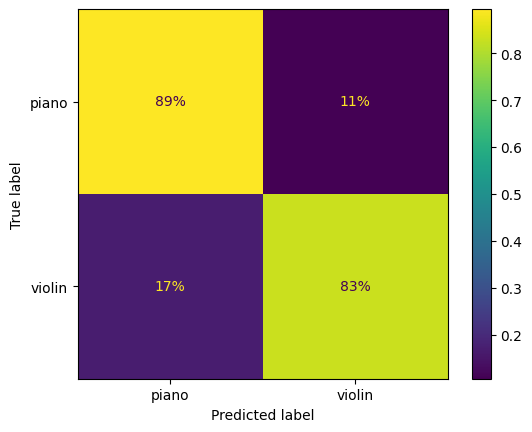

In [31]:
y_train_pred_rfc = cross_val_predict(model_rfc, X_train, y_train, cv=5)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred_rfc, normalize='true', values_format='.0%', display_labels=display_labels)
plt.show()

In [32]:
# test

In [33]:
cv_score_rfc_test = cross_val_score(model_rfc, X_test, y_test, cv=5, scoring='accuracy')
cv_score_rfc_test

array([0.79245283, 0.78846154, 0.80769231, 0.86538462, 0.84615385])

In [34]:
print('Accuracy cross validation Random Forest Classifier Test:', cv_score_rfc_test.mean())

Accuracy cross validation Random Forest Classifier Test: 0.8200290275761974


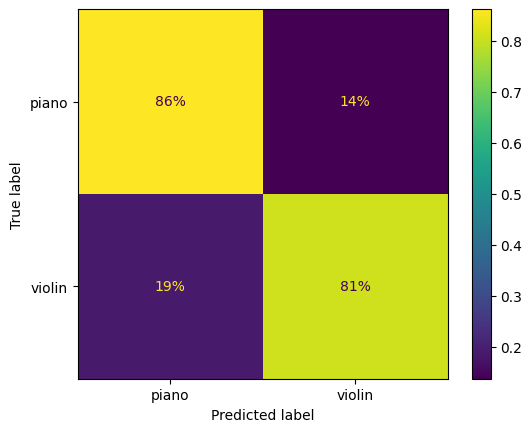

In [35]:
y_test_pred_rfc = cross_val_predict(model_rfc, X_test, y_test, cv=5)
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_rfc, normalize='true', values_format='.0%', display_labels=display_labels)
plt.show()

In [36]:
model_name = 'Random Forest Classifier Test'
average = 'macro'

accuracy_score_rfc_test = accuracy_score(y_test, y_test_pred_rfc)
precision_score_rfc_test = precision_score(y_test, y_test_pred_rfc, average=average)
f1_score_rfc_test = f1_score(y_test, y_test_pred_rfc, average=average)
recall_score_rfc_test = recall_score(y_test, y_test_pred_rfc, average=average)

print(f'Accuracy {model_name}:', accuracy_score_rfc_test)
print(f'Precision {model_name}:', precision_score_rfc_test)
print(f'F1 score {model_name}:', f1_score_rfc_test)
print(f'Recall score {model_name}:', recall_score_rfc_test)

Accuracy Random Forest Classifier Test: 0.8390804597701149
Precision Random Forest Classifier Test: 0.8374507697815968
F1 score Random Forest Classifier Test: 0.8367778439547349
Recall score Random Forest Classifier Test: 0.8362068965517241


In [37]:
re = classification_report(y_test, y_test_pred_rfc, target_names=display_labels, zero_division=0.0)

print(re)

              precision    recall  f1-score   support

       piano       0.85      0.86      0.86       145
      violin       0.82      0.81      0.82       116

    accuracy                           0.84       261
   macro avg       0.84      0.84      0.84       261
weighted avg       0.84      0.84      0.84       261

